M2780.002400 Machine Listening (Fall 2020)

Instructor: Kyogu Lee (kglee@snu.ac.kr)

# Assignment 7: Improving Machine Learning

(85 points)

Due Date : This assignment is due by 12:59PM, November 10 (Tuesday)


---

Assignment

This assignment is composed of two parts: Theory and Lab assignments, you will need to write the answers for the Theory problems and Notebook scripts and/or functions as required. Submit them electronically (via **ETL**) by the end of the due date.

# Theory (45pts)


---

1.   Bias and Variance, Regularization  (10 pts)

Suppose you are using Ridge Regression and you notice that the training error
and the validation error are almost equal and fairly high. Would you say that the
model suffers from high bias or high variance? Should you increase the regularization
hyperparameter α or reduce it?

---

2.   Regularization  (10 pts)

Suppose you are using Polynomial Regression. You plot the learning curves and
you notice that there is a large gap between the training error and the validation
error. What is happening? What are three ways to solve this?

---

3. Dropout (10 pts)

 a. Explain the dropout technique in terms of the dropout rate *p*.

 b. Does dropout slow down training? Does it slow down inference (i.e., making
predictions on new instances)?

---

4. Optimization (15 pts)

State the *True* or *False* for the followings.

  a. Adam should be used with batch gradient computations, not with mini-batches.

  b. Adam combines the advantages of RMSProp and gradient descent with momentum.

  c. The learning rate of the Adam optimizer does not need to be tuned.

# Lab (40pts)

For all lab assignments, submit your Notebook file (.ipynb) and audio files (.wav) with one compressed (.zip) file, via **ETL**. The Notebook file and zip file should be named with your full name and the homework number – e.g., ***아무개_hw7.ipynb, 아무개_hw7.zip***

In addition to writing Python scripts and/or functions in your Notebook file, there are also questions you’ll have to answer. For such questions, you should provide answers in your Notebook file using Text sections.

**Please submit the codes executed (make sure that the results of your codes are visible in the submitted assignments) so that the grader can check whether the code is working or not.**

In [114]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Activation, BatchNormalization
from keras.regularizers import l1, l2
from keras.utils import np_utils

from sklearn.metrics import classification_report, confusion_matrix
import itertools



---

1.   MNIST using keras with L1, L2 regularization  (10 pts)

Refer to the lab6 and Keras tutorials to create and learn a neural network that classifies MNIST handwriting data and organize the results using keras. Use the best model you created at problem 3 on assignment6. Implement l1 and l2 regularization on the loss function using keras.regularizers. Compare the results of three models, with no regularization, with L1 regularization, and L2 regularization using accuracy and confusion matrix.

In [70]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

In [98]:
batch_size = 256
epochs = 100

In [99]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 256
nn_hdim_4 = 64
output_dim = 10

model = Sequential()
model.add(Dense(nn_hdim_1, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(nn_hdim_2))
model.add(Activation('relu'))
model.add(Dense(nn_hdim_3))
model.add(Activation('relu'))
model.add(Dense(nn_hdim_4))
model.add(Dense(output_dim))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [100]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 2.2785 - accuracy: 0.1274
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 2.1676 - accuracy: 0.2698
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 2.0542 - accuracy: 0.4889
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 1.9319 - accuracy: 0.6172
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 1.8011 - accuracy: 0.6734
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 1.6650 - accuracy: 0.7059
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 1.5277 - accuracy: 0.7288
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 1.3942 - accuracy: 0.7463
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 1.2696 - accuracy: 0.7612
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 1.1571 - accura

235/235 [==============================] - 2s 7ms/step - loss: 0.2686 - accuracy: 0.9249
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2672 - accuracy: 0.9252
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2658 - accuracy: 0.9257
Epoch 84/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2644 - accuracy: 0.9261
Epoch 85/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2631 - accuracy: 0.9264
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2618 - accuracy: 0.9268
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2605 - accuracy: 0.9273
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2592 - accuracy: 0.9276
Epoch 89/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2579 - accuracy: 0.9280
Epoch 90/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2566 - accuracy: 

In [101]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.9343

Test accuracy: 0.9343000054359436


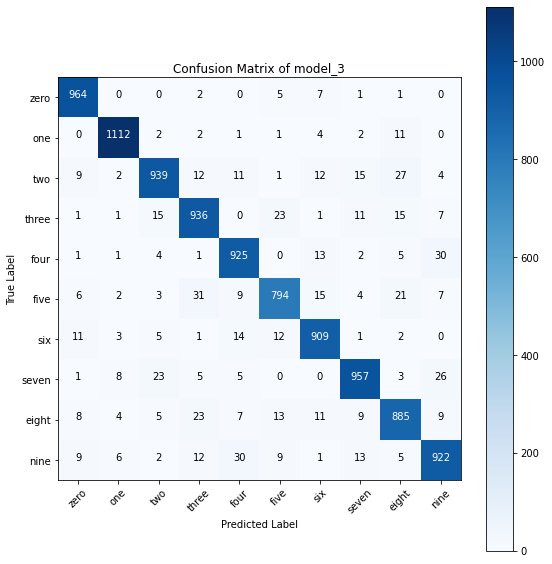

In [102]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model_3")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


In [106]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 256
nn_hdim_4 = 64
output_dim = 10
model_l1 = Sequential()
# model_l1.add(Dense(nn_hdim_1, input_dim=input_dim, ))
model_l1.add(Dense(nn_hdim_1, kernel_regularizer=l1(0.0001), input_dim=784))
model_l1.add(Activation('relu'))
model_l1.add(Dense(nn_hdim_2, kernel_regularizer=l1(0.0001)))
model_l1.add(Activation('relu'))
model_l1.add(Dense(nn_hdim_3, kernel_regularizer=l1(0.0001)))
model_l1.add(Activation('relu'))
model_l1.add(Dense(nn_hdim_4, kernel_regularizer=l1(0.0001)))
model_l1.add(Activation('relu'))
model_l1.add(Dense(output_dim, kernel_regularizer=l1(0.0001)))
model_l1.add(Activation('softmax'))

model_l1.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [107]:
print(X_train.shape)
model_l1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

(60000, 784)
Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 6.9373 - accuracy: 0.1662
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 6.8700 - accuracy: 0.2824
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 6.7928 - accuracy: 0.3722
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 6.7067 - accuracy: 0.4377
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 6.6129 - accuracy: 0.4930
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 6.5128 - accuracy: 0.5393
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 6.4075 - accuracy: 0.5853
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 6.2981 - accuracy: 0.6282
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 6.1857 - accuracy: 0.6681
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 6

235/235 [==============================] - 2s 9ms/step - loss: 4.7361 - accuracy: 0.9153
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 4.7316 - accuracy: 0.9158
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 4.7271 - accuracy: 0.9160
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 4.7227 - accuracy: 0.9165
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 4.7183 - accuracy: 0.9171
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 4.7140 - accuracy: 0.9172
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 4.7096 - accuracy: 0.9180
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 4.7053 - accuracy: 0.9181
Epoch 89/100
235/235 [==============================] - 2s 9ms/step - loss: 4.7011 - accuracy: 0.9184
Epoch 90/100
235/235 [==============================] - 2s 9ms/step - loss: 4.6968 - accuracy: 

In [108]:
score = model_l1.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 4.6432 - accuracy: 0.9269

Test accuracy: 0.9269000291824341


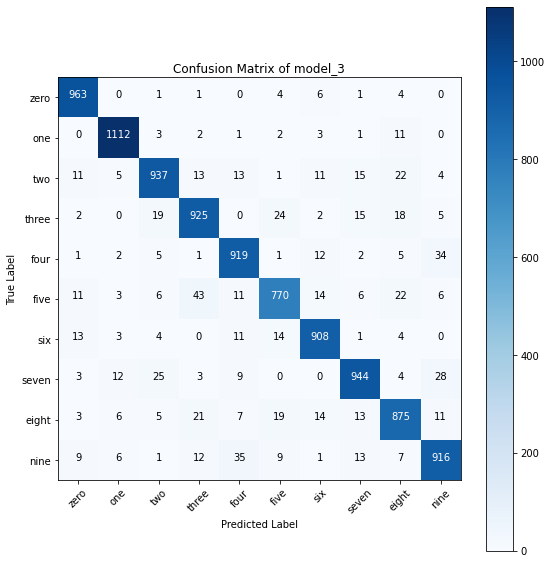

In [109]:
Y_pred = model_l1.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model_3")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


In [110]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 256
nn_hdim_4 = 64
output_dim = 10
model_l2 = Sequential()
# model_l1.add(Dense(nn_hdim_1, input_dim=input_dim, ))
model_l2.add(Dense(nn_hdim_1, kernel_regularizer=l2(0.001), input_dim=784))
model.add(Activation('relu'))
model_l2.add(Dense(nn_hdim_2, kernel_regularizer=l2(0.001), input_dim=784))
model.add(Activation('relu'))
model_l2.add(Dense(nn_hdim_3, kernel_regularizer=l2(0.001), input_dim=784))
model.add(Activation('relu'))
model_l2.add(Dense(nn_hdim_4, kernel_regularizer=l2(0.001), input_dim=784))
model.add(Activation('relu'))
model_l2.add(Dense(output_dim, kernel_regularizer=l2(0.001), input_dim=784))
model_l2.add(Activation('softmax'))

model_l2.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [111]:
print(X_train.shape)
model_l2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

(60000, 784)
Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 4.2079 - accuracy: 0.2253
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 3.6436 - accuracy: 0.5706
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 3.2791 - accuracy: 0.7249
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 3.0439 - accuracy: 0.7828
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 2.8882 - accuracy: 0.8110
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 2.7816 - accuracy: 0.8280
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 2.7058 - accuracy: 0.8395
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 2.6501 - accuracy: 0.8480
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 2.6077 - accuracy: 0.8544
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 2.

235/235 [==============================] - 2s 9ms/step - loss: 2.2403 - accuracy: 0.9131
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 2.2385 - accuracy: 0.9132
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 2.2366 - accuracy: 0.9130
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 2.2347 - accuracy: 0.9133
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 2.2328 - accuracy: 0.9137
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 2.2310 - accuracy: 0.9138
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 2.2291 - accuracy: 0.9139
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 2.2272 - accuracy: 0.9138
Epoch 89/100
235/235 [==============================] - 2s 9ms/step - loss: 2.2254 - accuracy: 0.9139
Epoch 90/100
235/235 [==============================] - 2s 9ms/step - loss: 2.2236 - accuracy: 

In [112]:
score = model_l2.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.1986 - accuracy: 0.9189

Test accuracy: 0.9189000129699707


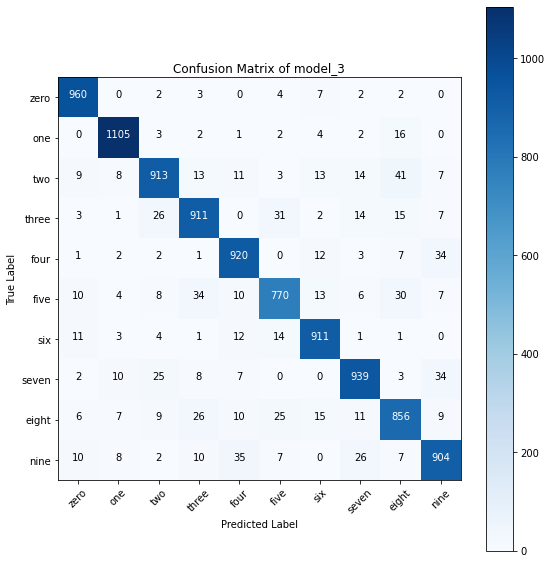

In [113]:
Y_pred = model_l2.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model_3")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()



---


2.   MNIST using keras with batch normalization  (10 pts)


Refer to the lab6 and Keras tutorials  to create and learn a neural network that classifies MNIST handwriting data and organize the results using keras. Use the best model you created at problem 3 on assignment6. Implement barch normalization on two of your hidden layers using keras.layers.BatchNormalization. Compare the results of two models, with batch normalizaion and without batch normalization using accuracy and confusion matrix.

In [115]:
input_dim=784
nn_hdim_1 = 1024
nn_hdim_2 = 512
nn_hdim_3 = 256
nn_hdim_4 = 64
output_dim = 10
model_bn = Sequential()
# model_l1.add(Dense(nn_hdim_1, input_dim=input_dim, ))
model_bn.add(Dense(nn_hdim_1, input_dim=784))
model.add(BatchNormalization())
model.add(Activation('relu'))
model_bn.add(Dense(nn_hdim_2, input_dim=784))
model.add(BatchNormalization())
model.add(Activation('relu'))
model_bn.add(Dense(nn_hdim_3, input_dim=784))
model.add(BatchNormalization())
model.add(Activation('relu'))
model_bn.add(Dense(nn_hdim_4, input_dim=784))
model.add(BatchNormalization())
model.add(Activation('relu'))
model_bn.add(Dense(output_dim, input_dim=784))
model_bn.add(Activation('softmax'))

model_bn.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

In [116]:
model_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 2.2129 - accuracy: 0.1880
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 1.6503 - accuracy: 0.5326
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 1.2804 - accuracy: 0.7085
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 1.0407 - accuracy: 0.7710
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.8831 - accuracy: 0.8019
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.7755 - accuracy: 0.8219
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6989 - accuracy: 0.8346
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6426 - accuracy: 0.8444
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.5995 - accuracy: 0.8518
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.5656 - accura

235/235 [==============================] - 2s 7ms/step - loss: 0.3069 - accuracy: 0.9137
Epoch 82/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3063 - accuracy: 0.9139
Epoch 83/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3058 - accuracy: 0.9140
Epoch 84/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3053 - accuracy: 0.9144
Epoch 85/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3047 - accuracy: 0.9143
Epoch 86/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3042 - accuracy: 0.9145
Epoch 87/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3038 - accuracy: 0.9144
Epoch 88/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3033 - accuracy: 0.9147
Epoch 89/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3028 - accuracy: 0.9150
Epoch 90/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3023 - accuracy: 

In [117]:
score = model_bn.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 925us/step - loss: 0.2911 - accuracy: 0.9176

Test accuracy: 0.9175999760627747


In [ ]:
Y_pred = model_bn.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of model_3")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()



---


3.   MNIST using keras with different optimizers  (20 pts)


Refer to the lab6 and Keras tutorials to create and learn a neural network that classifies MNIST handwriting data and organize the results using keras. Use the best model you created at problem 3 on assignment6. Change the optimizer of the model to Stochastic Gradient Descent, RMSprop, Adagrad, and Adam using  keras.optimizers. Compare the results of the four models using accuracy, confusion matrix, and by plotting the loss of the models by epoch as they train.